# Dataset 1 : Life Expectancy WHO 

Predicting factors that are contributing to the value of life expectancy of people of different countries.

https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

1.Country-
Country

2.Year-
Year

3.Status-
Developed or Developing status-

4.Life expectancy-
Life Expectancy in age

5.Adult Mortality-
Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

6.infant deaths-
Number of Infant Deaths per 1000 population

7.Alcohol-
Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

8.percentage expenditure-
Expenditure on health as a percentage of Gross Domestic Product per capita(%)

9.Hepatitis B-
Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

10.Measles-
Measles - number of reported cases per 1000 population

11.BMI-
Average Body Mass Index of entire population

12.under-five deaths-
Number of under-five deaths per 1000 population

13.Polio-
Polio (Pol3) immunization coverage among 1-year-olds (%)

14.Total expenditure-
General government expenditure on health as a percentage of total government expenditure (%)

15.Diphtheria-
Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

16.HIV / AIDS-
Deaths per 1 000 live births HIV/AIDS (0-4 years)

17.GDP-
Gross Domestic Product per capita (in USD)

18.Population-
Population of the country

19.thinness 1-19 years-
Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

20.thinness 5-9 years-
Prevalence of thinness among children for Age 5 to 9(%)

21.Income composition of resources-
Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

22.Schooling-
Number of years of Schooling(years)

In [714]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [715]:
le_data=pd.read_csv("Life_Expectancy_Data.csv")

In [716]:
le_data.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [717]:
le_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [718]:
le_data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [719]:
features=le_data.columns.tolist()
features

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

#### There are whitespaces in the column names

### Triming / Removing whitespaces from  the column names

In [720]:
features=le_data.columns.tolist()
for i in features:
    new_name=i.strip()
    le_data.rename(columns={i:new_name},inplace=True)

In [721]:
features=le_data.columns.tolist()
features

['Country',
 'Year',
 'Status',
 'Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [722]:
le_data_num=le_data.select_dtypes('number')
le_data_num

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [723]:
le_data_cat=le_data.select_dtypes('object')
le_data_cat

,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing
...,...,...
2933,Zimbabwe,Developing
2934,Zimbabwe,Developing
2935,Zimbabwe,Developing
2936,Zimbabwe,Developing


### Categorical Features

In [724]:
le_data_cat.isnull().sum()

Country    0
Status     0
dtype: int64

#### There are no missing values in categorical columns

### Numerical Features

In [725]:
le_data_num.isnull().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

#### There are missing values in numerical columns

In [726]:
le_data_num['Life expectancy'].isnull().sum()

10

**There are missing values in Life Expectancy column which is our target column hence we have to drop them.**

In [727]:
le_data.shape

(2938, 22)

In [728]:
# using subset to remove null values in target column
le_data.dropna(subset=['Life expectancy'],inplace=True)
le_data.shape

(2928, 22)

### Creating a list of numerical features with missing values

In [729]:
le_data_num_features_withnull =[x for x in le_data.select_dtypes('number').columns.tolist() if le_data[x].isnull().sum()>0]
le_data[le_data_num_features_withnull].isnull().sum()

Alcohol                            193
Hepatitis B                        553
BMI                                 32
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                443
Population                         644
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

### Discrete numerical features

In [730]:
discrete_features_withnull=[]
for i in le_data_num_features_withnull:
    if(le_data[i].value_counts().count()<=20):
        discrete_features_withnull.append(i)
discrete_features_withnull

[]

### Continous numerical features

In [731]:
continous_features_withnull=[]
for i in le_data_num_features_withnull:
    if(le_data[i].value_counts().count()>=20):
        continous_features_withnull.append(i)
continous_features_withnull

['Alcohol',
 'Hepatitis B',
 'BMI',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

**Since there are many missing values we need to find the relationship between missing values and Life Expectancy. If these missing value greatly affect the dependant feature, we can't drop the rows containing these values.**

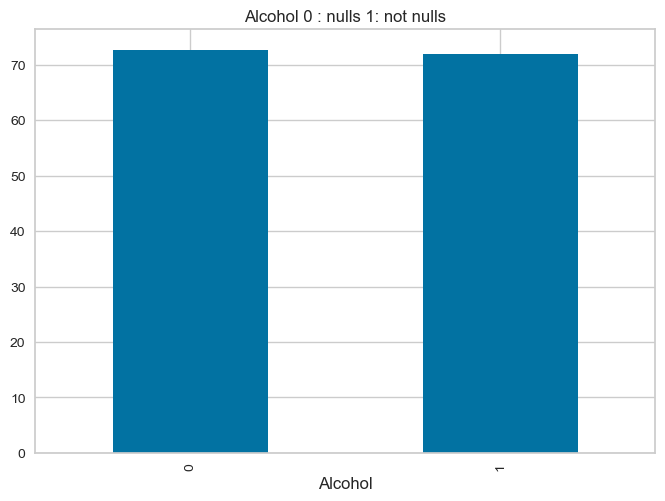

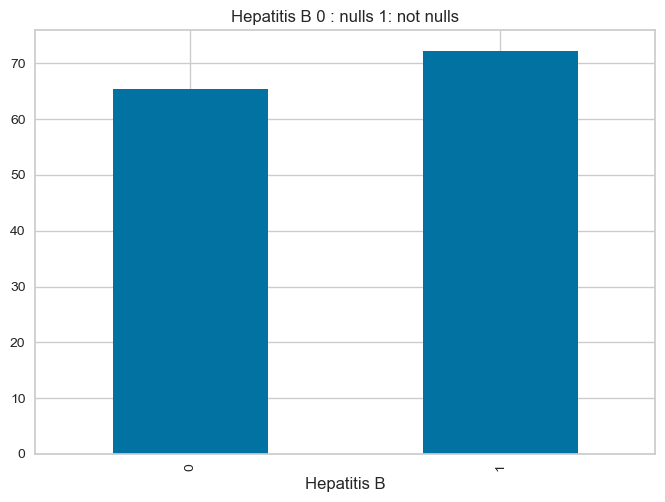

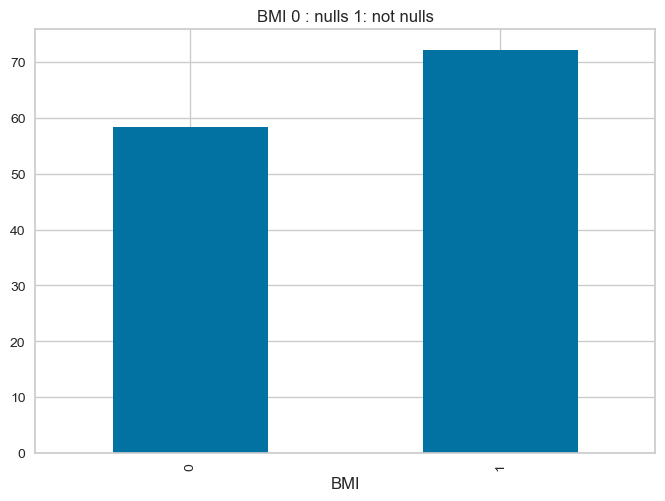

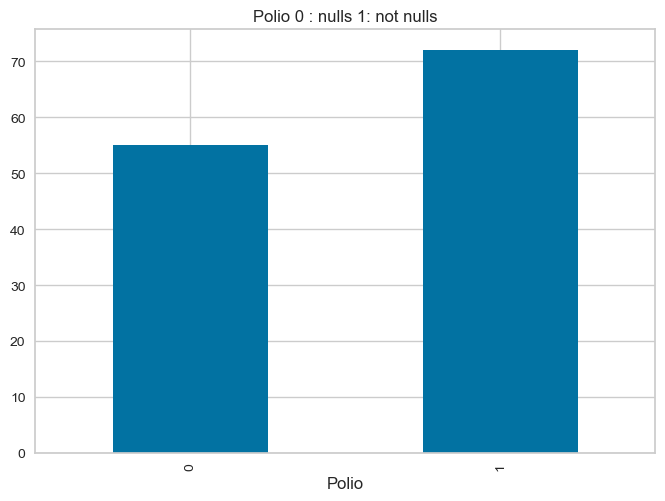

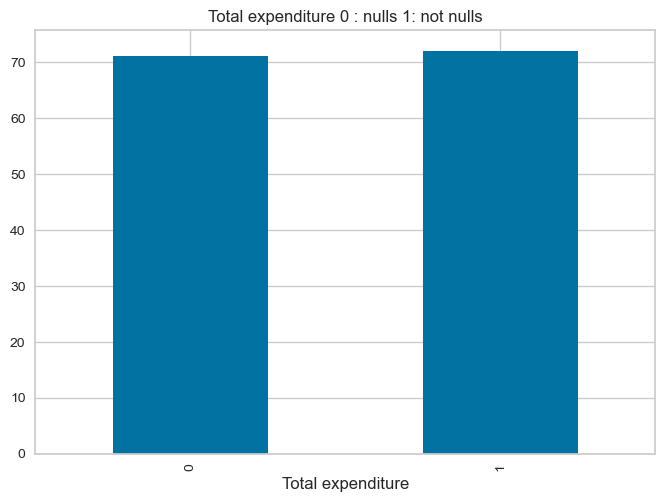

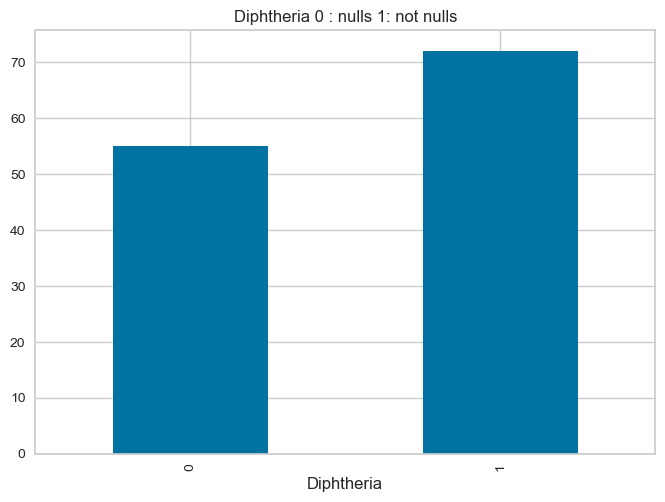

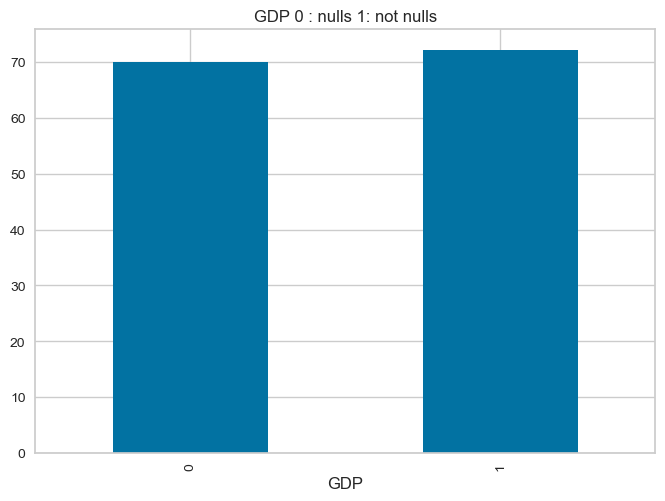

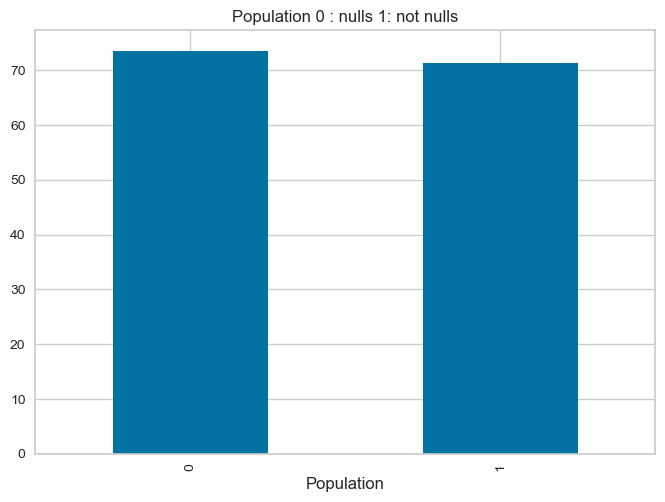

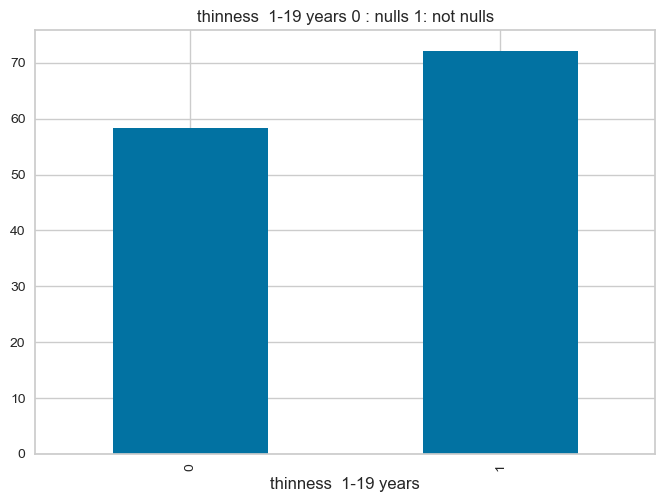

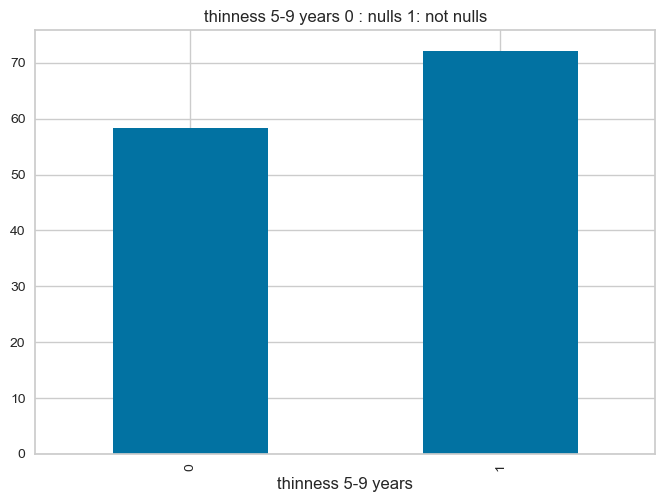

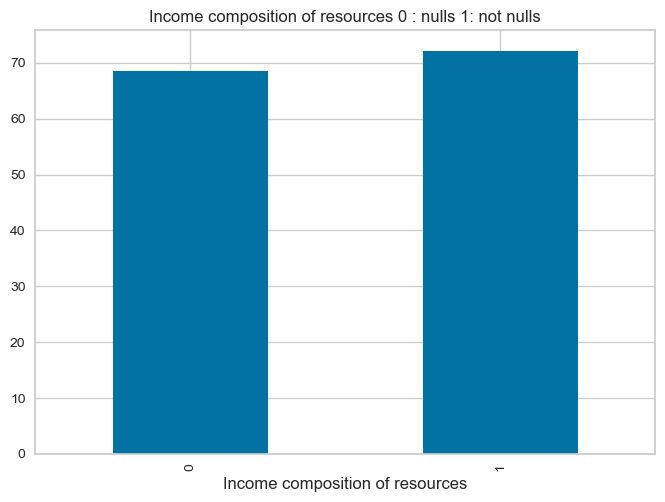

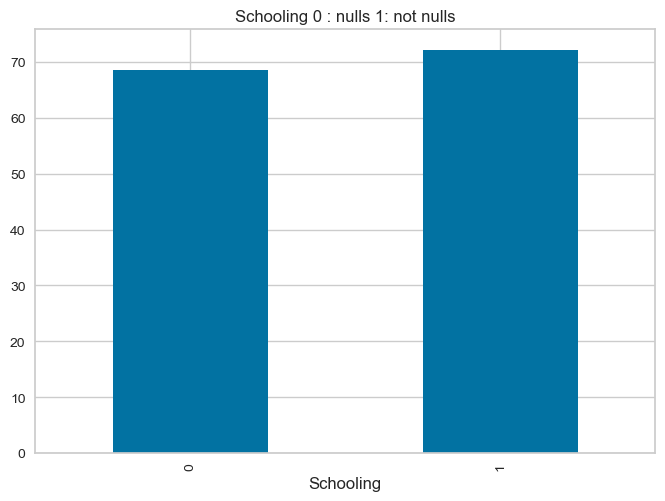

In [732]:
for feature in continous_features_withnull:
    data = le_data.copy()
    data[feature]=np.where(data[feature].isnull(),0,1)
    data.groupby(feature)['Life expectancy'].median().plot.bar()
    plt.title(feature +' 0 : nulls 1: not nulls' )
    plt.show()

**Interpretation: For population and alcohol feature the median life expectancy is more for the rows having null values. Hence we will be keeping the rows with null values and handling them rather than dropping them.**

### Imputing missing values in numerical columns:
1. we have to consider mode value for imputing in features with discrete values
2. we have to consider median or mean values for imputing in features with continuous values

### Imputing with mode for columns with discrete values

In [733]:
for i in discrete_features_withnull:
    data=le_data.copy()
    mode_val=data[i].mode().values[0]
    le_data[i].fillna(mode_val,inplace=True)

In [734]:
le_data[discrete_features_withnull].isnull().sum()

Series([], dtype: float64)

### Imputing with median and mode for continous values.
1. If the feature has outliers, imputing missing values with median of the feature values
2. Else imputing missing values in the feature with mean of the feature values as mean is prone to outliers

In [735]:
for i in continous_features_withnull:
    data=le_data.copy()
    if(le_data[abs(stats.zscore(le_data['GDP']))>3].shape[0]):
        median_val=data[i].median()
        le_data[i].fillna(median_val,inplace=True)
    else:
        mean_val=data[i].mean()
        le_data[i].fillna(mean_val,inplace=True)

In [736]:
stats.zscore(le_data['GDP'])

0      -0.525277
1      -0.523115
2      -0.521667
3      -0.518762
4      -0.564861
          ...   
2933   -0.535151
2934   -0.535228
2935   -0.565331
2936   -0.527988
2937   -0.528082
Name: GDP, Length: 2928, dtype: float64

In [737]:
le_data[continous_features_withnull].isnull().sum()

Alcohol                            0
Hepatitis B                        0
BMI                                0
Polio                              0
Total expenditure                  0
Diphtheria                         0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [738]:
# convert year to datetime datatype
le_data['Year']=pd.to_datetime(le_data['Year'])

In [739]:
le_data.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000
mean,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.026315e+07,4.833675,4.865232,0.630128,12.016052
std,9.523867,124.292079,118.114450,3.914923,1990.930605,22.531361,11485.970937,19.850184,160.700547,23.340548,2.385478,23.629576,5.085542,13157.128331,5.411179e+07,4.399553,4.487535,0.205440,3.254407
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,1.107500,4.853964,80.960842,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,578.797095,4.181205e+05,1.600000,1.600000,0.504000,10.300000
50%,72.100000,144.000000,3.000000,4.160000,65.611455,87.000000,17.000000,43.000000,4.000000,93.000000,5.930163,93.000000,0.100000,3112.560501,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.400000,442.614322,96.000000,362.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7494.210719,4.592777e+06,7.100000,7.200000,0.773000,14.100000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## 1. 5 countries with min avg life expectancy?

<Figure size 1000x800 with 0 Axes>

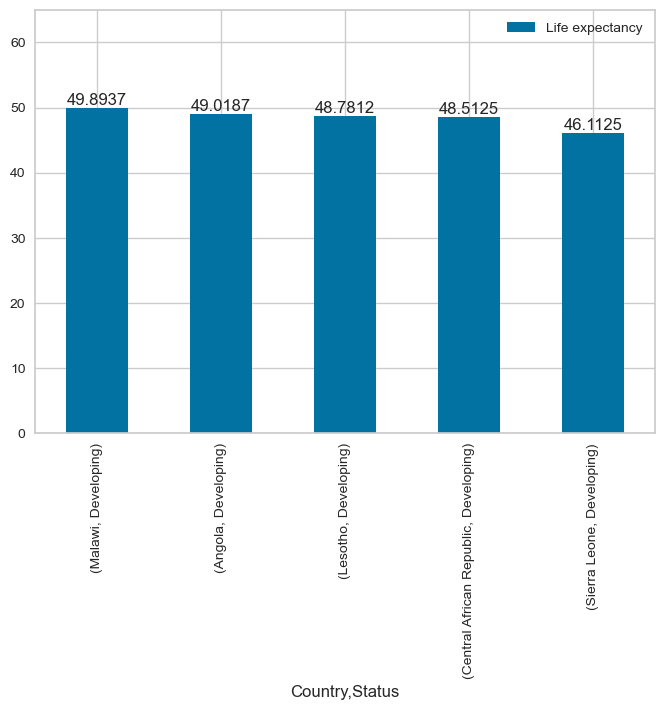

In [740]:
plt.figure(figsize=(10,8))
axiss=le_data.pivot_table(index=['Country','Status'],values='Life expectancy', aggfunc='mean').sort_values(by='Life expectancy',ascending=False).tail(5).plot(kind='bar')
plt.ylim(0,65)
for i in axiss.containers:
    axiss.bar_label(i)

**Interpretation:**
1. The lowest avg life expectancy is 49.05years that is of Sierra Leone.**
2. All the countries with lowest average life expectancy fall under the Developing status.**

## 2. Does status of a country affect average life expectancy?

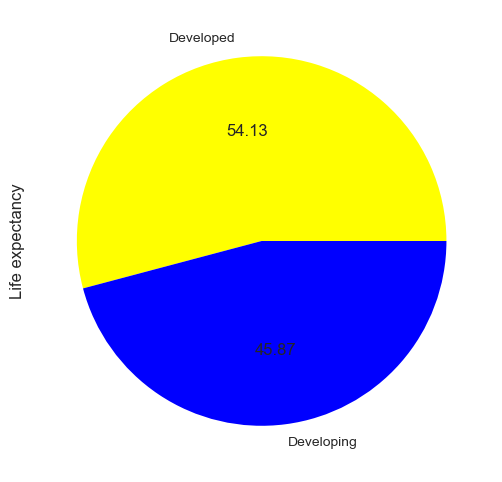

In [741]:
plt.figure(figsize=(8,6))
le_data.groupby(['Status'])['Life expectancy'].mean().plot(kind='pie',autopct='%1.2f',y='Life Expectancy',colors=['yellow','blue'])
plt.show()

**Interpretation:**
1. Developed countries are showing higher average Life expectancy than developing countries.**
2. This might be because of the availability and accessibility of better medical facilities in developed countries.**

## 3. Which countries have the highest adult mortality rate ?

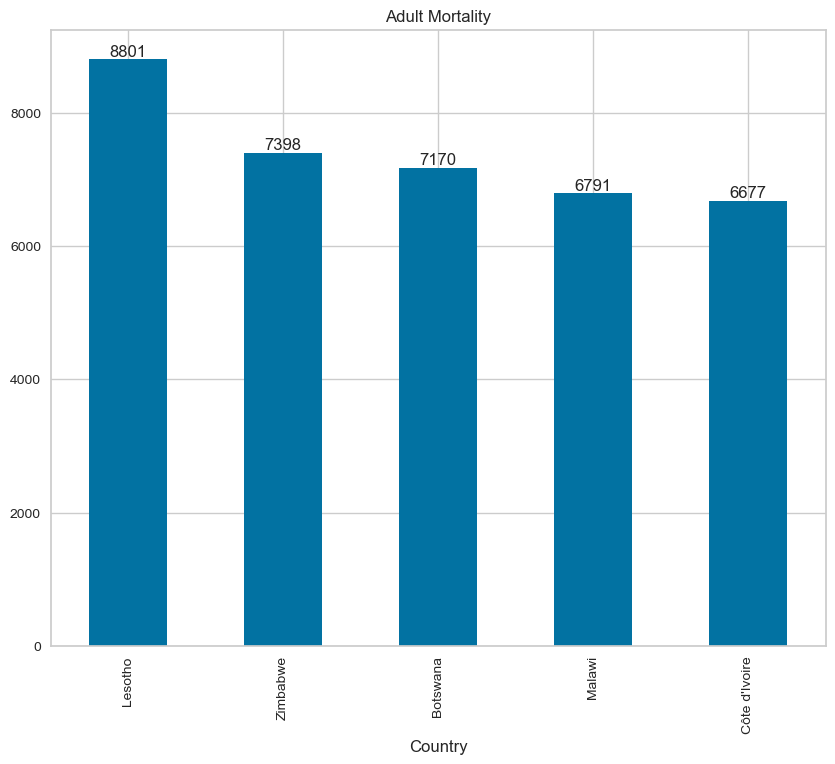

In [742]:
plt.figure(figsize=(10,8))

plt.title("Adult Mortality")
axiss=le_data.groupby(['Country'])['Adult Mortality'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
for i in axiss.containers:
    axiss.bar_label(i)
plt.show()

**Interpretation:**
1. Developing countries are showing higher adult mortality rate with Lesotho being at the top.**
2. This might be because of the availability and accessibility of better medical facilities in developed countries.**

# 4. Which countries have the highest infant mortality?

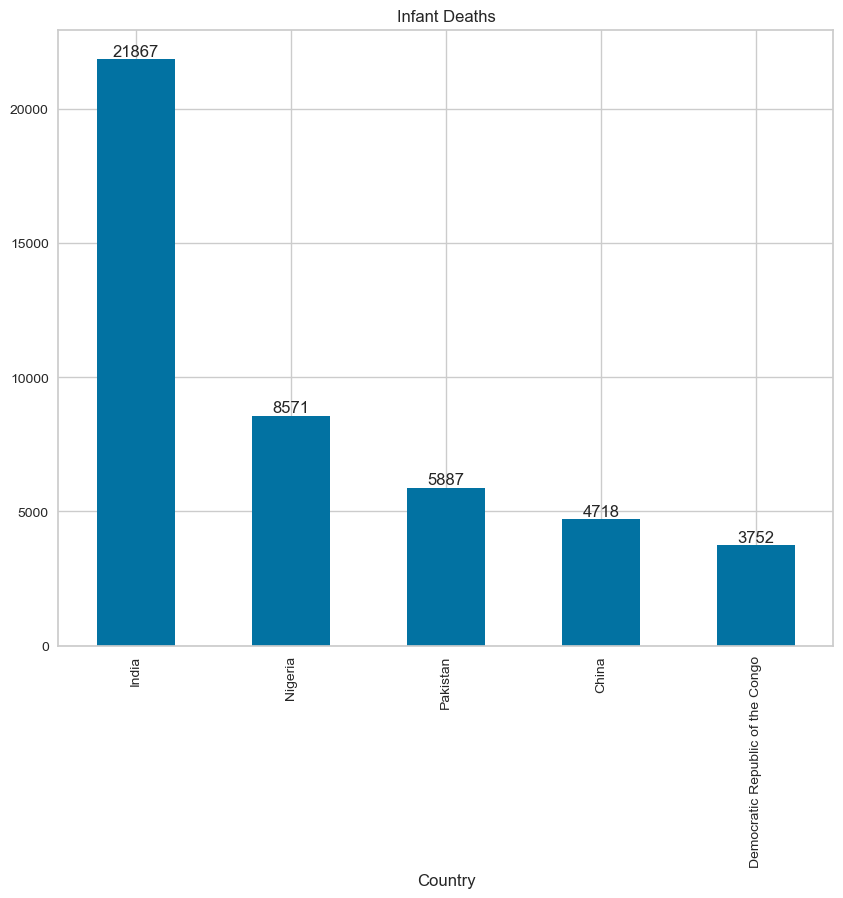

In [743]:
infantdeathdata=le_data.groupby(['Country'])['infant deaths'].sum()

plt.figure(figsize=(10,8))
axiss=infantdeathdata.sort_values(ascending=False).head(5).plot(kind='bar')
plt.title("Infant Deaths")
for i in axiss.containers:
    axiss.bar_label(i)

**Interpretation:**
1. Developing countries are showing higher infant deaths with India being at the top.
2. This might be because of the availability and accessibility of better medical facilities in developed countries.

## 5. Does lower GDP per capita affect Adult Mortality?

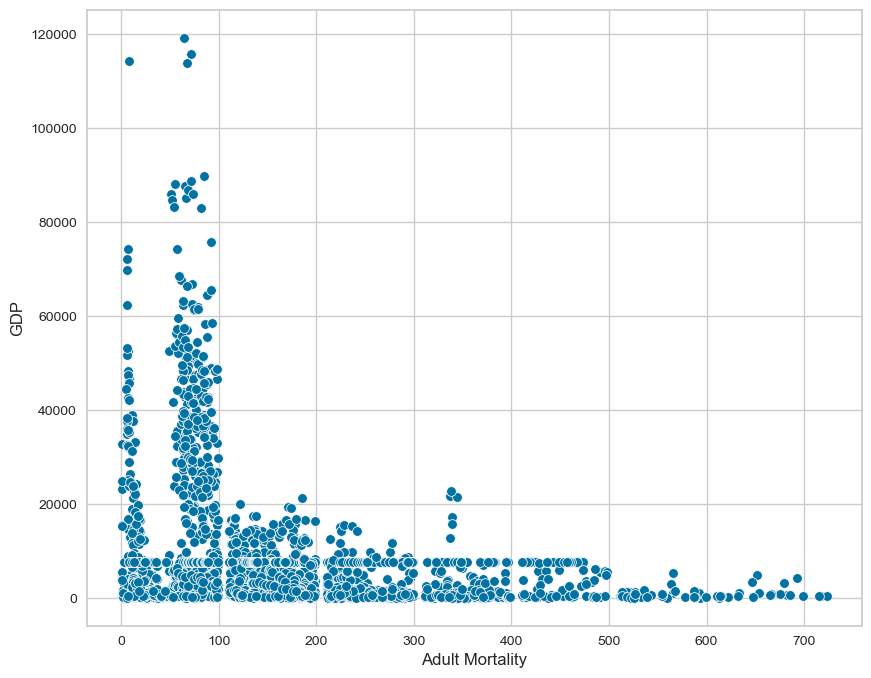

In [744]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=le_data,x='Adult Mortality',y='GDP')
plt.show()

**Interpretation:**
1. Adult mortalityis high for countries with lower GDP per capital. GDP per capita represents the average income or economic output per person in a country. This indicates that the people who are economically incapable of availing the medical facilities have higher chances of death.

## 5. How the Life Expectancy changing with time for countries of different status?

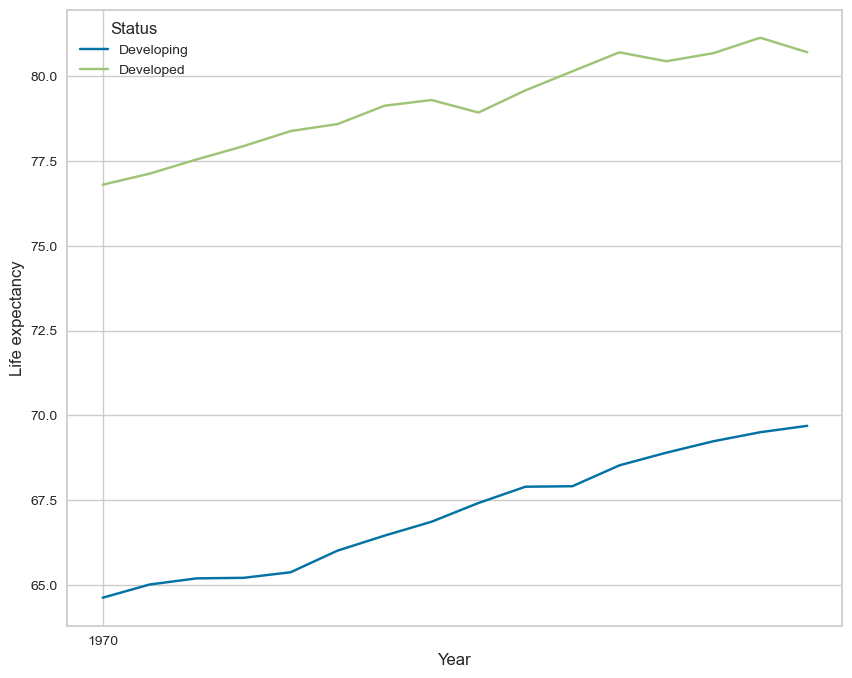

In [745]:
plt.figure(figsize=(10,8))
sns.lineplot(data=le_data,y='Life expectancy',x='Year', hue='Status', errorbar=None)
plt.show()

**Interpretation:**
1. Life expectancy is growing in case of developed countries as well as developing countries with passing years
2. But the Life expectancy was comparatively very low in case of developing countries that is around 64 in 1970 whereas in case of developed countries it was around 77 in 1970.

### Plotting the distributions for Numerical columns

<Figure size 1000x1000 with 0 Axes>

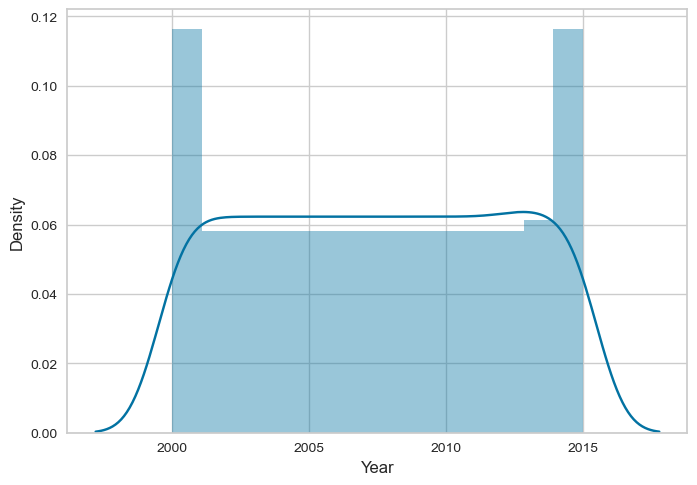

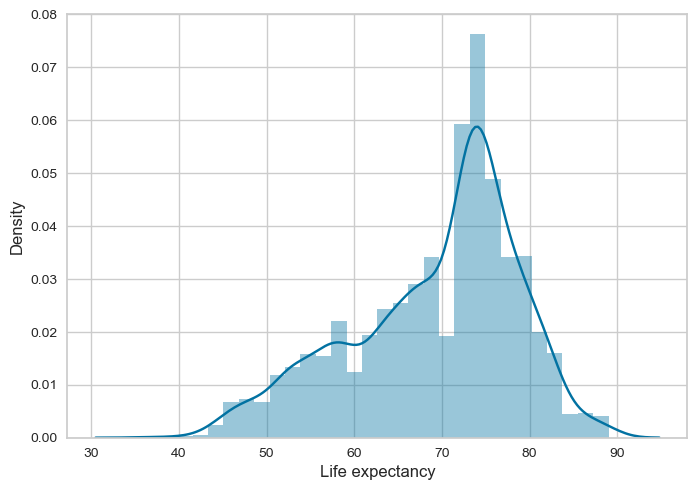

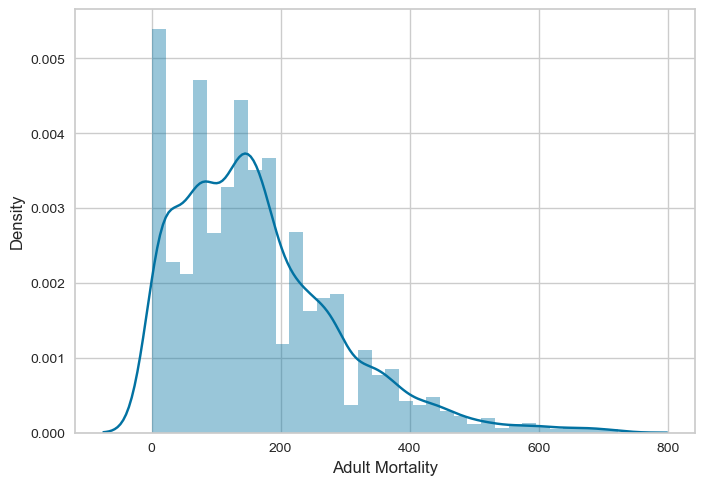

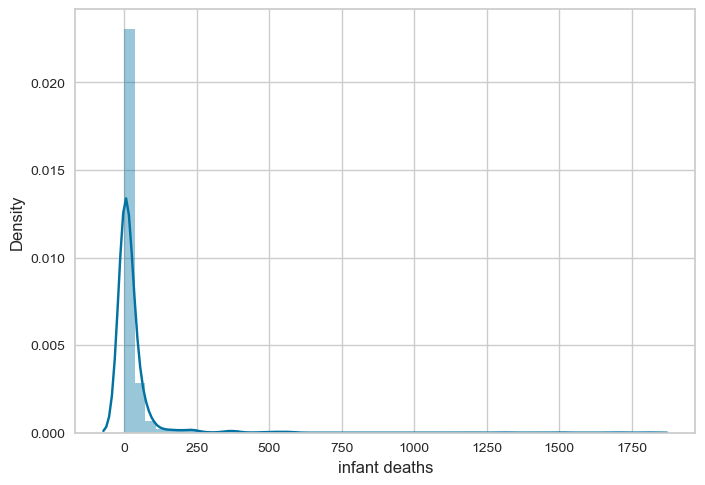

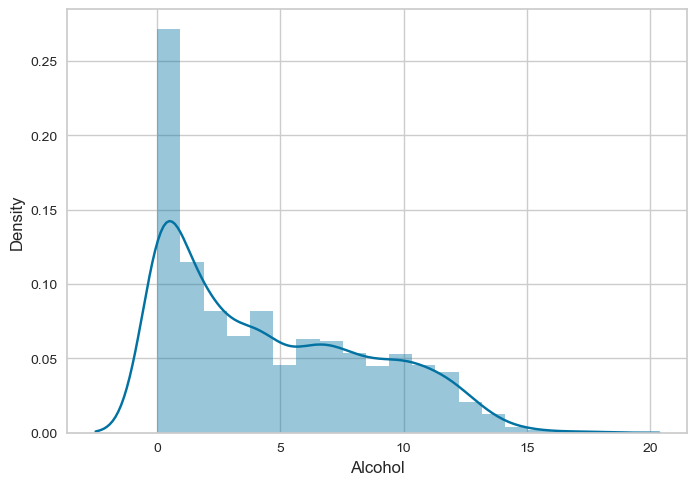

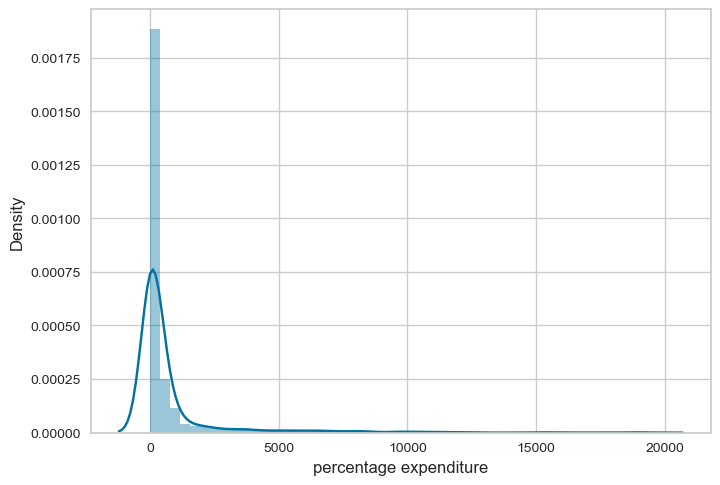

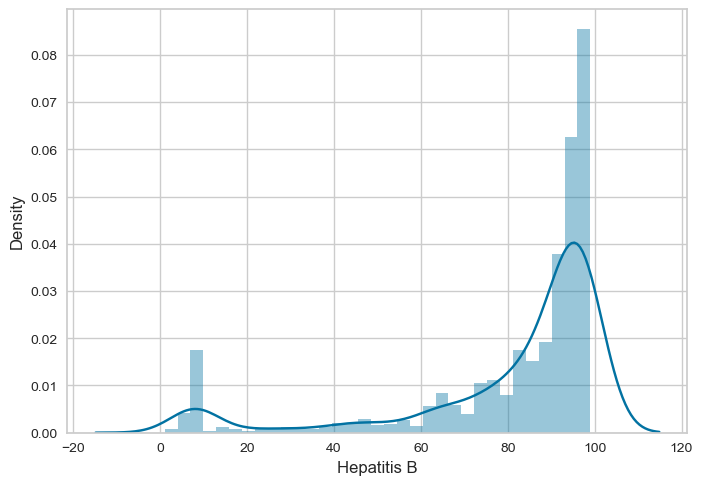

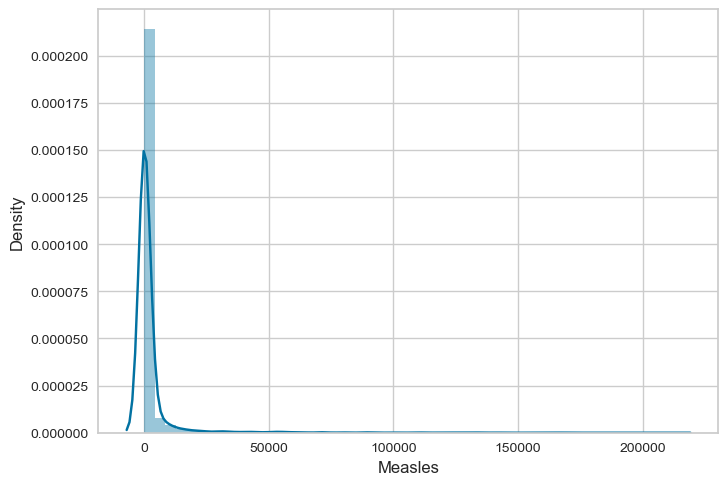

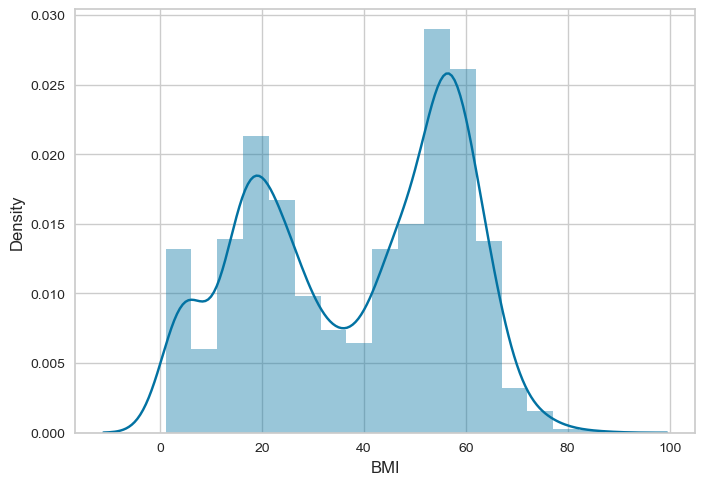

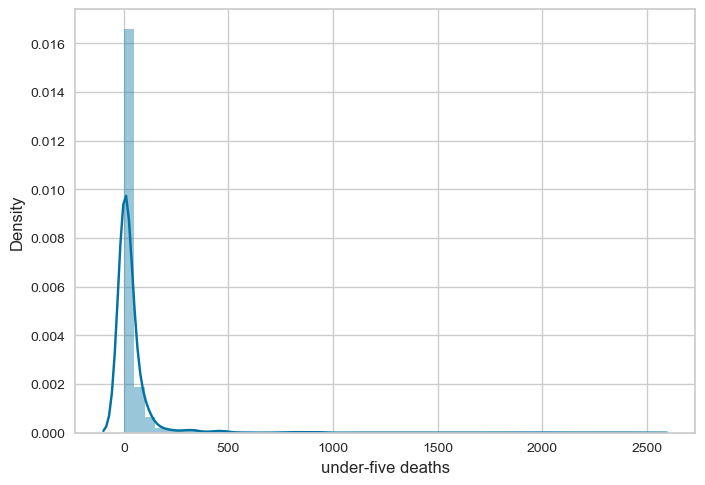

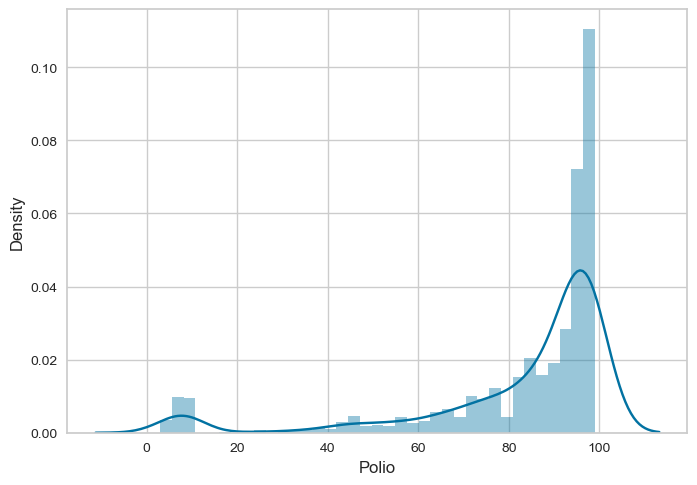

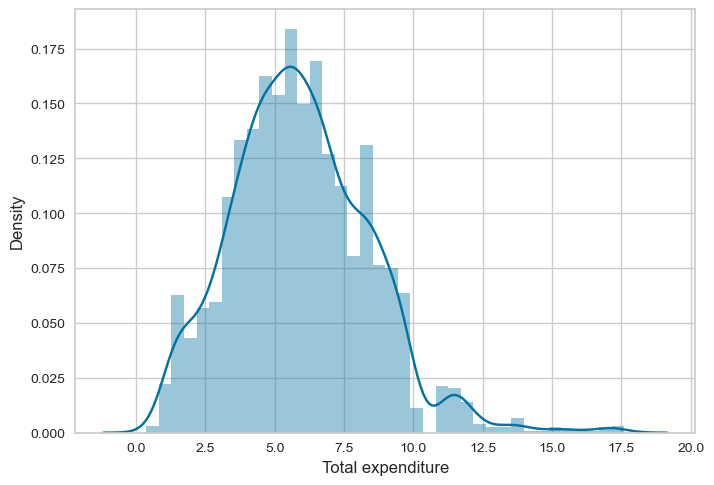

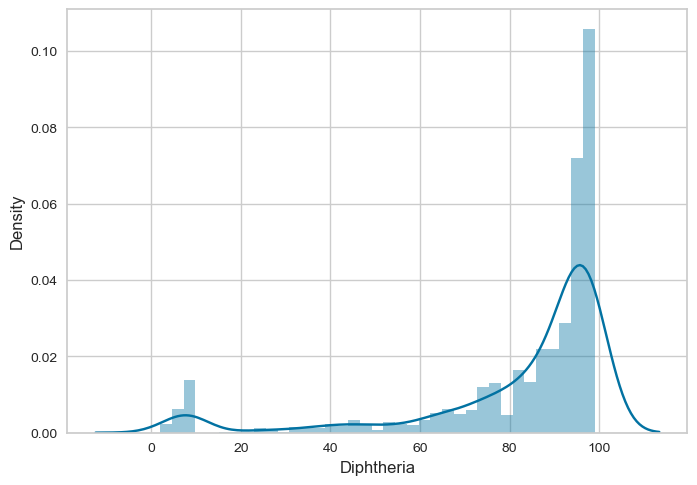

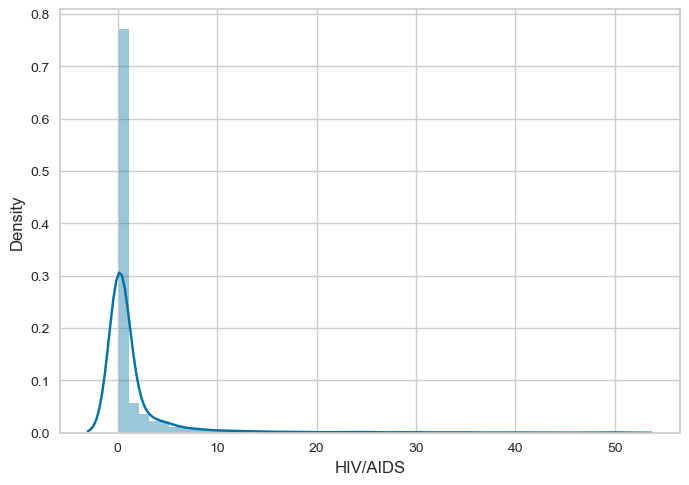

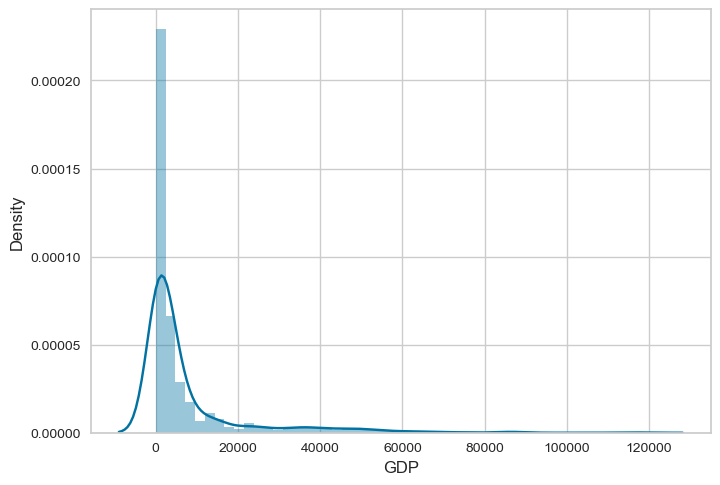

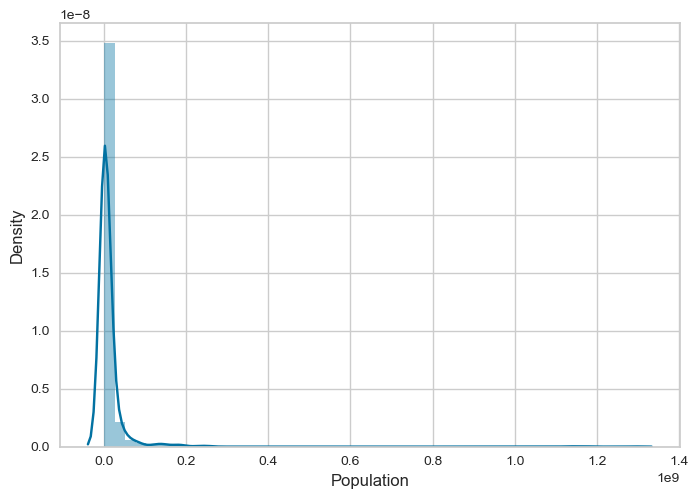

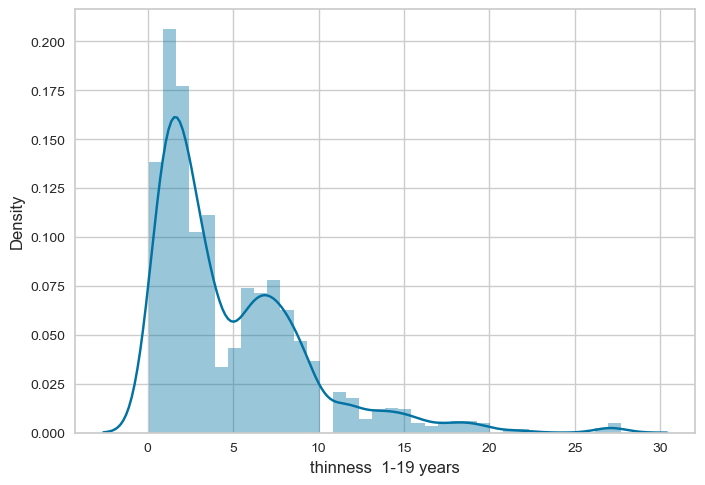

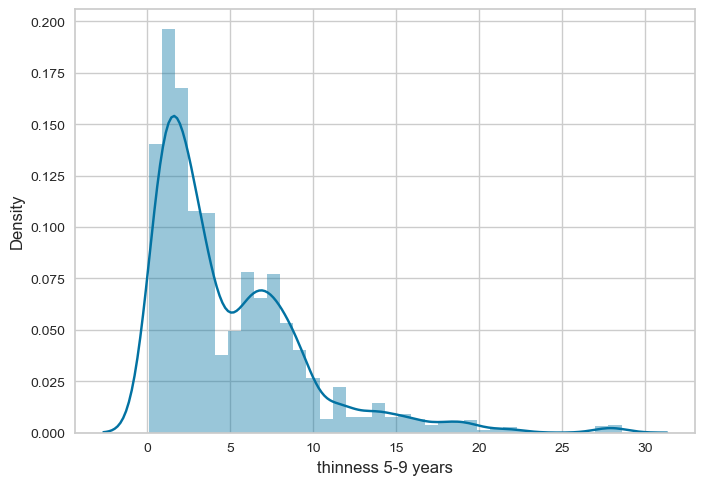

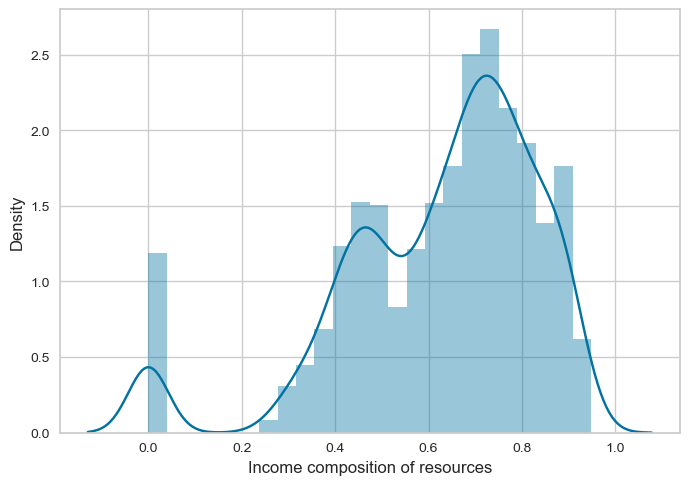

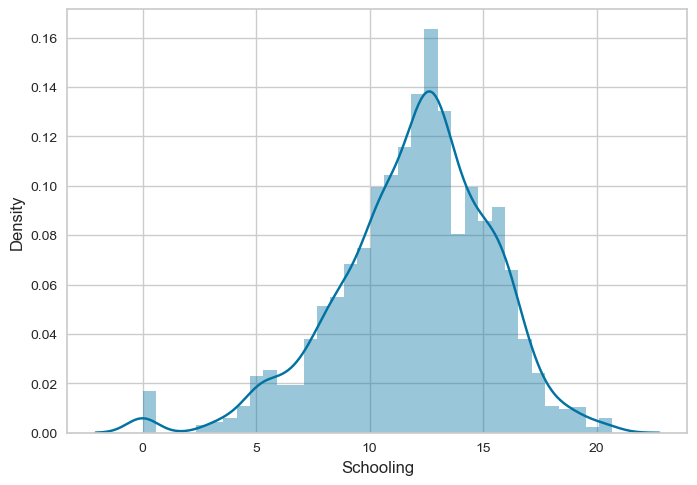

In [746]:
plt.figure(figsize=(10,10))
for i in le_data_num.columns.tolist():
    plt.figure()
    sns.distplot(le_data_num[i])
    plt.show()

**Interpretation:**
1. Most people have a life expectancy of 72-78 years.
2. Highest number of adulty mortality rate lies in the region 0-200. (probability of dying between 15 and 60 years per 1000 population)
3. Most common number of infant deaths is in between 0-10 per 1000 population
4. Maximum consumption (in litres of pure alcohol) is seen between 0-10 liters which is alarming
5. Expenditure on health as a percentage of Gross Domestic Product per capita(%) is very low for maximum contries.
6. There are still people who are not Hepatitis B (HepB) immunized which is again a concern.
7. The no of measles cases reported lies between 0 to 40.
8. A lot of people show a higher BMI around 40 to 65 which is alarming.
9. Maximum number of under-five deaths per 1000 population lies between 0-10 which is similar to number of infant deaths
10. There are still people who are not Polio (Pol3) immunized.
11. Total government expenditure on health as a percentage of total government expenditure  is quite low and mostly lie between 4.5 and 6
12. Deaths per 1000 live births HIV/AIDS (0-4 years) has negative values which needs to be handled

# Data Preprocessing

In [747]:
le_data.skew()

Life expectancy                    -0.638605
Adult Mortality                     1.174369
infant deaths                       9.771044
Alcohol                             0.607622
percentage expenditure              4.643790
Hepatitis B                        -2.146879
Measles                             9.425290
BMI                                -0.231828
under-five deaths                   9.479623
Polio                              -2.104791
Total expenditure                   0.600863
Diphtheria                         -2.079352
HIV/AIDS                            5.386623
GDP                                 3.476242
Population                         17.943300
thinness  1-19 years                1.727662
thinness 5-9 years                  1.793650
Income composition of resources    -1.208178
Schooling                          -0.615206
dtype: float64

### Interpretation:
1. Population has high positive skewness
2. Infant deaths, measles  and under-five deaths are again highly positively skewedm
3. Percentage expenditure, HIV/AIDS and GDP are comparatively less positively skewed.
4. High values of positive skewness depicts the columns have large number of outliers towards the right side of the distribution

In [748]:
positive_skewed_features=['Population','HIV/AIDS','GDP','infant deaths','Measles', 'under-five deaths', 'percentage expenditure']
for i in positive_skewed_features:
    print(i,":",le_data[i].skew())

Population : 17.94330030397561
HIV/AIDS : 5.386623166297798
GDP : 3.476241503952702
infant deaths : 9.771044493066025
Measles : 9.425290043118961
under-five deaths : 9.47962292313507
percentage expenditure : 4.643789671991245


#### Using logarithmic to remove the positive skewness and transforming the data into normal distributions for the columns

In [749]:
# creating temp_data and checking the behavior after log transformation
temp_data=pd.DataFrame()
for i in positive_skewed_features:
    temp_data['log_'+i]=np.log(le_data[i])

In [750]:
temp_data.skew()

log_Population               -0.692730
log_HIV/AIDS                  1.278320
log_GDP                      -0.438477
log_infant deaths                  NaN
log_Measles                        NaN
log_under-five deaths              NaN
log_percentage expenditure         NaN
dtype: float64

- Log transform had too great and effect on the data distribution in 'infant deaths','Measles', 'under-five deaths', 'percentage expenditure' features, and make the distribution negatively skewed. Hence we are getting nan values

**Taking log value to reduce skewness for 'Population', 'HIV/AIDS', 'GDP' features**

In [751]:
for i in ['Population','HIV/AIDS','GDP']:
    le_data[i]=np.log(le_data[i])

In [752]:
le_data.skew()

Life expectancy                   -0.638605
Adult Mortality                    1.174369
infant deaths                      9.771044
Alcohol                            0.607622
percentage expenditure             4.643790
Hepatitis B                       -2.146879
Measles                            9.425290
BMI                               -0.231828
under-five deaths                  9.479623
Polio                             -2.104791
Total expenditure                  0.600863
Diphtheria                        -2.079352
HIV/AIDS                           1.278320
GDP                               -0.438477
Population                        -0.692730
thinness  1-19 years               1.727662
thinness 5-9 years                 1.793650
Income composition of resources   -1.208178
Schooling                         -0.615206
dtype: float64

In [753]:
le_data[['infant deaths','Measles', 'under-five deaths', 'percentage expenditure']].skew()

infant deaths             9.771044
Measles                   9.425290
under-five deaths         9.479623
percentage expenditure    4.643790
dtype: float64

#### Opting for Square root transform to make the variations more uniform in 'infant deaths', 'Measles', 'under-five deaths', 'percentage expenditure' features.

In [754]:
# creating temp_data and checking the behavior after log transformation
temp_data=pd.DataFrame()
for i in ['infant deaths','Measles', 'under-five deaths', 'percentage expenditure']:
    temp_data['sqrt_'+i]=np.sqrt(le_data[i])

In [755]:
temp_data.skew()

sqrt_infant deaths             3.582767
sqrt_Measles                   4.165464
sqrt_under-five deaths         3.489379
sqrt_percentage expenditure    2.353691
dtype: float64

In [756]:
for i in ['infant deaths','Measles', 'under-five deaths', 'percentage expenditure']:
    le_data[i]=np.sqrt(le_data[i])

- Square transform reduced thepositive skewness in the data distribution of 'infant deaths','Measles', 'under-five deaths', 'percentage expenditure' features.

In [757]:
le_data.skew()

Life expectancy                   -0.638605
Adult Mortality                    1.174369
infant deaths                      3.582767
Alcohol                            0.607622
percentage expenditure             2.353691
Hepatitis B                       -2.146879
Measles                            4.165464
BMI                               -0.231828
under-five deaths                  3.489379
Polio                             -2.104791
Total expenditure                  0.600863
Diphtheria                        -2.079352
HIV/AIDS                           1.278320
GDP                               -0.438477
Population                        -0.692730
thinness  1-19 years               1.727662
thinness 5-9 years                 1.793650
Income composition of resources   -1.208178
Schooling                         -0.615206
dtype: float64

In [758]:
le_data_num = le_data.select_dtypes(include='number')
le_data_num.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,7.874008,0.01,8.442726,65.0,33.970576,19.1,9.110434,6.0,8.16,65.0,-2.302585,6.370345,17.334091,17.2,17.3,0.479,10.1
1,59.9,271.0,8.000000,0.01,8.574589,62.0,22.181073,18.6,9.273618,58.0,8.18,62.0,-2.302585,6.417870,12.699494,17.5,17.5,0.476,10.0
2,59.9,268.0,8.124038,0.01,8.556824,64.0,20.736441,18.1,9.433981,62.0,8.13,64.0,-2.302585,6.448486,17.272826,17.7,17.7,0.470,9.9
3,59.5,272.0,8.306624,0.01,8.842184,67.0,52.792045,17.6,9.643651,67.0,8.52,67.0,-2.302585,6.507217,15.123021,17.9,18.0,0.463,9.8
4,59.2,275.0,8.426150,0.01,2.664040,68.0,54.890801,17.2,9.848858,68.0,7.87,68.0,-2.302585,4.151626,14.906964,18.2,18.2,0.454,9.5


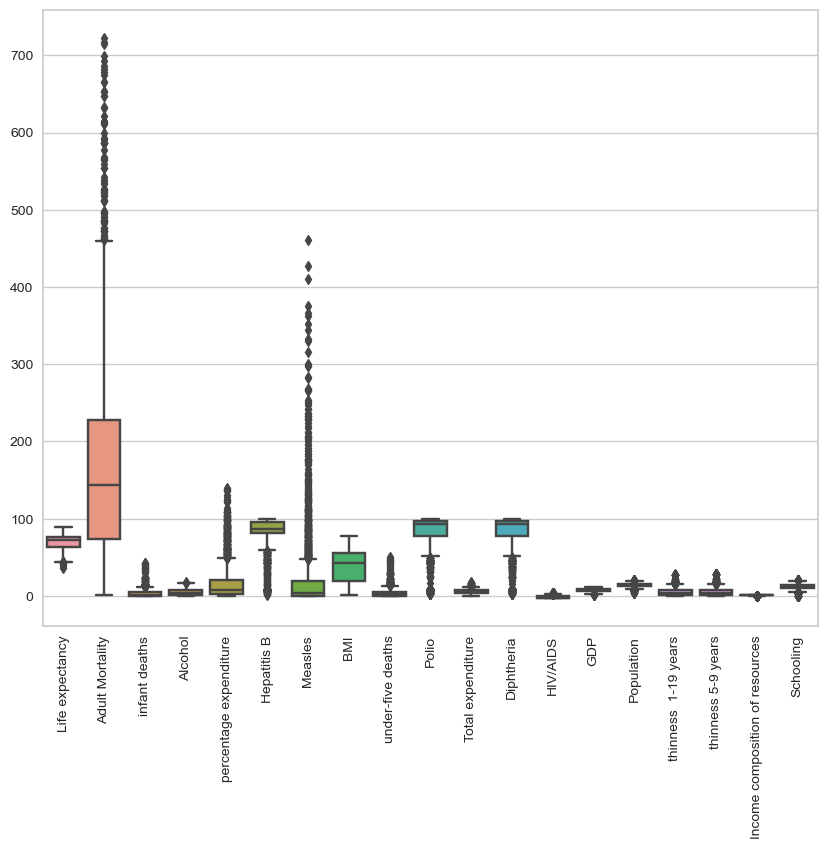

In [759]:
# checking outliers for numerical columns
plt.figure(figsize=(10,8))
sns.boxplot(data=le_data)
plt.xticks(rotation = 90)
plt.show()

**Interpretation: As there are outliers in the data and outliers as they can skew the results and don't give us enough examples to learn from**

## Outlier Removal

In [760]:
#getting threshold for outliers
Q1=le_data_num.quantile(0.25)
Q3=le_data_num.quantile(0.75)
IQR=Q3-Q1
lower_bound= Q1 - 1.5*IQR
upper_bound= Q3 + 1.5*IQR

In [761]:
le_data.shape

(2928, 22)

In [762]:
le_data=le_data[~((le_data_num<lower_bound)|(le_data_num>upper_bound)).any(axis=1)]

In [763]:
le_data.shape

(1586, 22)

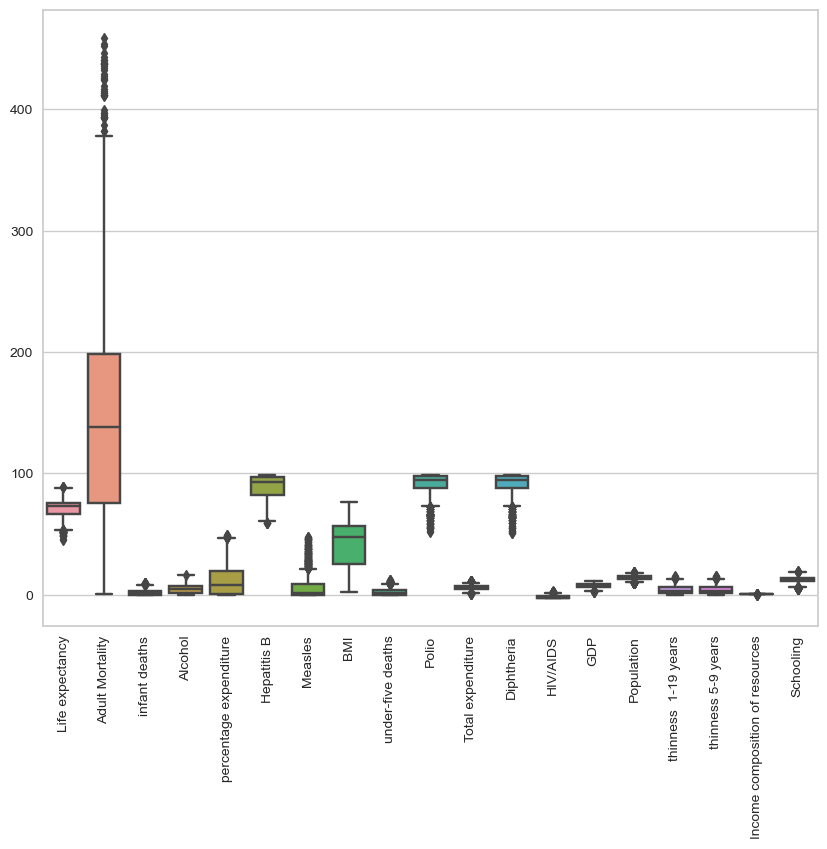

In [764]:
# checking outliers for numerical columns
plt.figure(figsize=(10,8))
sns.boxplot(data=le_data)
plt.xticks(rotation = 90)
plt.show()

### Interpretation:

The outliers are grouped together closely hence we can proceed.

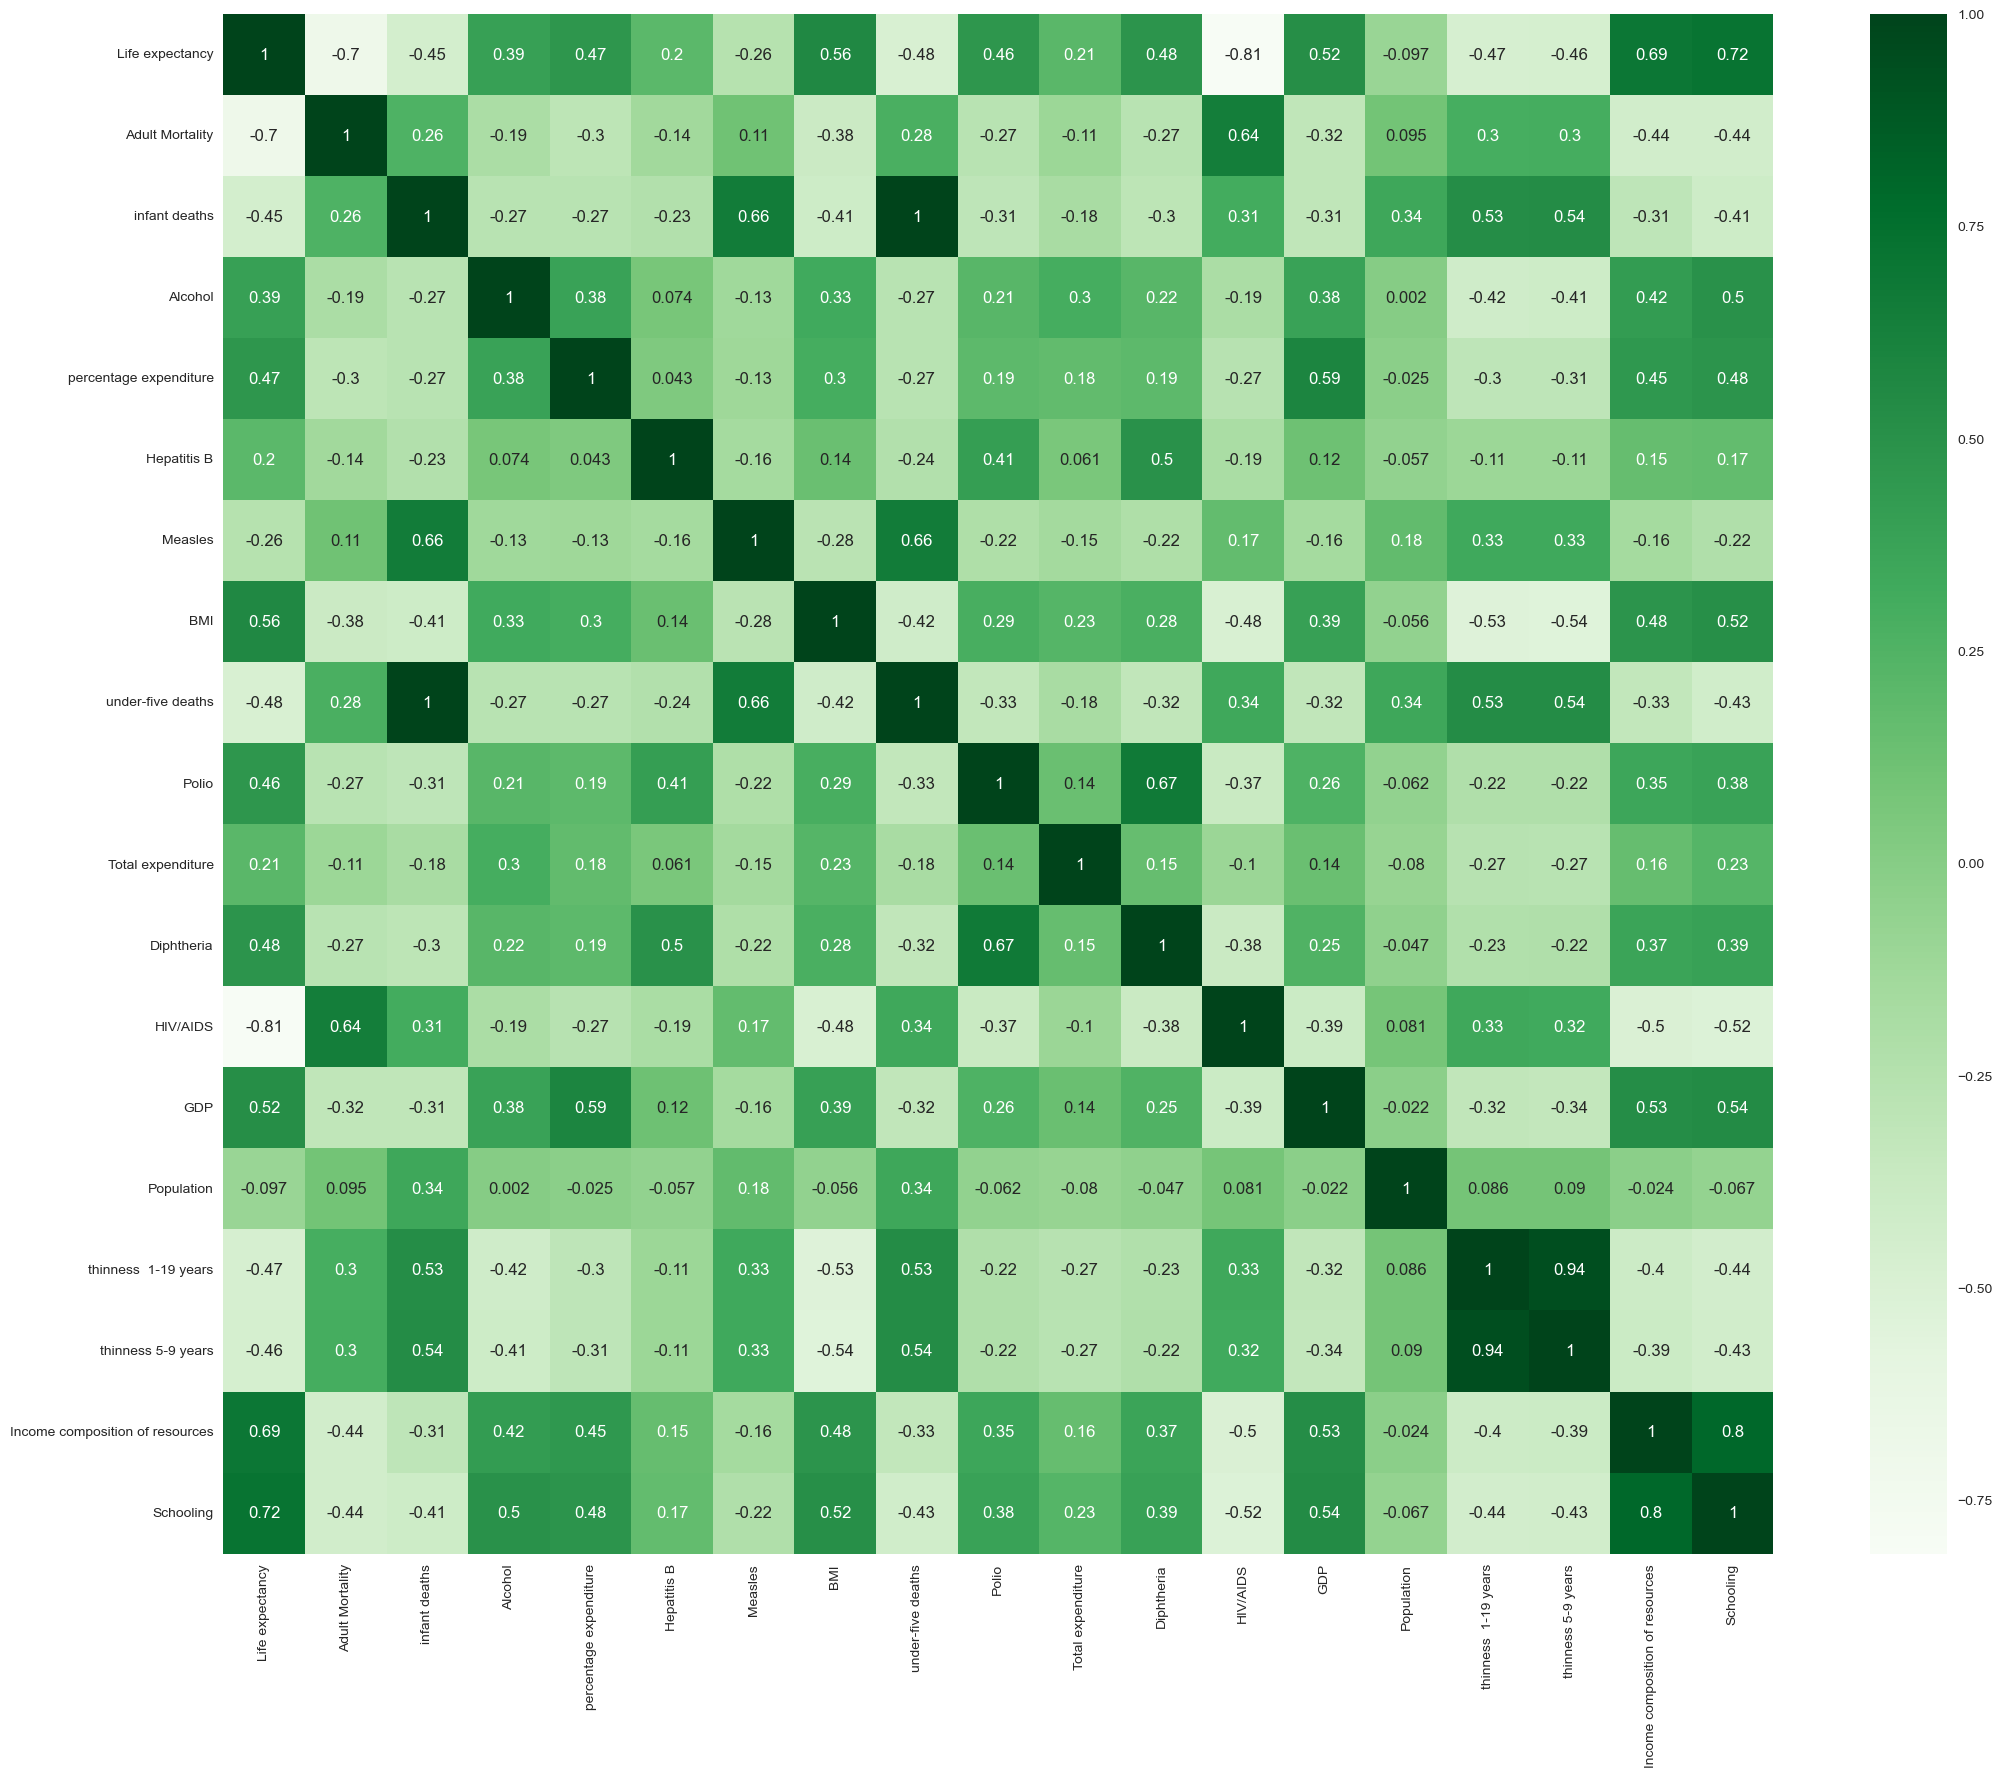

In [765]:
# correlation matrix:
plt.figure(figsize=(25,20))
sns.heatmap(le_data_num.corr(),annot=True,cmap='Greens')

plt.show()

### Interpretation:

1. 'under 5 deaths' and 'infant deaths' features are highly correlated. Hence dropping 1 of the column won't affect the performance of the model. Hence dropping 'under 5 death' column.
2. 'gdp' and 'percentage expenditure' features are highly correlated. Hence dropping 1 of the column won't affect the performance of the model. Hence dropping 'percentage expenditure' column.
3. 'thinness 1-19 years' and 'thinness 5-9 years' features are highly correlated. Hence dropping 1 of the column won't affect the performance of the model. Hence dropping 'thinness 5-9 years' column.

In [766]:
X = le_data.drop(['Life expectancy','Country'],axis=1)
y = le_data['Life expectancy']

In [767]:
X_num=X.select_dtypes('number')
X_num

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
16,74.0,0.000000,4.600000,19.104325,99.0,0.000000,58.0,0.000000,99.0,6.000000,99.0,-2.302585,8.282541,10.270662,1.2,1.3,0.762,14.2
17,8.0,0.000000,4.510000,20.706257,98.0,0.000000,57.2,1.000000,98.0,5.880000,98.0,-2.302585,8.428529,12.573884,1.2,1.3,0.761,14.2
18,84.0,0.000000,4.760000,20.757576,99.0,0.000000,56.5,1.000000,99.0,5.660000,99.0,-2.302585,8.392700,12.576228,1.3,1.4,0.759,14.2
20,88.0,0.000000,5.370000,20.906030,99.0,5.291503,55.1,1.000000,99.0,5.710000,99.0,-2.302585,8.397774,12.595391,1.4,1.5,0.738,13.3
21,91.0,1.000000,5.280000,6.467052,99.0,3.162278,54.3,1.000000,99.0,5.340000,99.0,-2.302585,6.203262,12.582181,1.4,1.5,0.725,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,368.0,5.477226,2.300000,11.994577,94.0,5.099020,2.2,6.855655,93.0,4.730000,94.0,2.208274,7.038005,16.414967,6.7,6.6,0.518,11.6
2922,336.0,4.690416,4.614856,0.000000,87.0,0.000000,31.8,5.656854,88.0,5.930163,87.0,1.824549,4.776547,16.574092,5.6,5.5,0.507,10.3
2923,371.0,4.795832,6.500000,3.289771,91.0,0.000000,31.3,5.830952,92.0,6.440000,91.0,1.840550,4.847917,16.550636,5.9,5.7,0.498,10.3
2924,399.0,5.000000,6.390000,3.265993,95.0,0.000000,3.8,6.000000,95.0,6.880000,95.0,1.916923,4.711577,11.954118,6.2,6.0,0.488,10.4


In [768]:
X_cat=X.select_dtypes('object')
X_cat

,Status
16,Developing
17,Developing
18,Developing
20,Developing
21,Developing
...,...
2912,Developing
2922,Developing
2923,Developing
2924,Developing


### Rescaling numeric columns

In [769]:
scaler = StandardScaler()
X_num_scaled= scaler.fit_transform(X_num)

In [770]:
type(X_num_scaled)

numpy.ndarray

In [771]:
# Convert the scaled numpy array back to DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled,index=X_num.index,columns=X_num.columns)

In [772]:
X_num_scaled

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
16,-0.747523,-0.923362,-0.030817,0.585947,1.011195,-0.637104,0.864734,-0.906646,0.828592,0.059713,0.844377,-0.613038,0.364974,-2.097579,-0.957048,-0.918278,0.612681,0.639206
17,-1.422357,-0.923362,-0.053947,0.718822,0.901620,-0.637104,0.822582,-0.541145,0.723337,-0.001042,0.737670,-0.613038,0.458148,-0.828756,-0.957048,-0.918278,0.605381,0.639206
18,-0.645275,-0.923362,0.010302,0.723079,1.011195,-0.637104,0.785698,-0.541145,0.828592,-0.112426,0.844377,-0.613038,0.435281,-0.827465,-0.923186,-0.884741,0.590783,0.639206
20,-0.604376,-0.923362,0.167067,0.735392,1.011195,-0.109271,0.711932,-0.541145,0.828592,-0.087111,0.844377,-0.613038,0.438520,-0.816908,-0.889325,-0.851204,0.437495,0.292351
21,-0.573702,-0.492835,0.143938,-0.462271,1.011195,-0.321663,0.669779,-0.541145,0.828592,-0.274439,0.844377,-0.613038,-0.962083,-0.824186,-0.889325,-0.851204,0.342603,-0.015965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,2.258557,1.434730,-0.621901,-0.003782,0.463319,-0.128471,-2.075392,1.599101,0.197062,-0.583276,0.310840,2.788159,-0.429325,1.287260,0.905338,0.859197,-1.168375,-0.362820
2922,1.931365,1.095987,-0.027000,-0.998691,-0.303706,-0.637104,-0.515755,1.160939,-0.329214,0.024355,-0.436112,2.498830,-1.872654,1.374920,0.532860,0.490287,-1.248668,-0.863833
2923,2.289232,1.141371,0.457469,-0.725816,0.134594,-0.637104,-0.542101,1.224571,0.091807,0.282480,-0.009282,2.510894,-1.827103,1.361998,0.634445,0.557361,-1.314363,-0.863833
2924,2.575525,1.229271,0.429200,-0.727788,0.572894,-0.637104,-1.991087,1.286359,0.407572,0.505248,0.417548,2.568479,-1.914120,-1.170179,0.736030,0.657973,-1.387357,-0.825294


In [773]:
X_num_scaled.shape

(1586, 18)

### OHE for categorical columns

In [774]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)
X_cat_encoded.shape

(1586, 2)

### Merge X_num_scaled and X_cat_encoded into X

In [775]:
X=pd.concat([X_num_scaled,X_cat_encoded],axis=1)
X

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
16,-0.747523,-0.923362,-0.030817,0.585947,1.011195,-0.637104,0.864734,-0.906646,0.828592,0.059713,0.844377,-0.613038,0.364974,-2.097579,-0.957048,-0.918278,0.612681,0.639206,0,1
17,-1.422357,-0.923362,-0.053947,0.718822,0.901620,-0.637104,0.822582,-0.541145,0.723337,-0.001042,0.737670,-0.613038,0.458148,-0.828756,-0.957048,-0.918278,0.605381,0.639206,0,1
18,-0.645275,-0.923362,0.010302,0.723079,1.011195,-0.637104,0.785698,-0.541145,0.828592,-0.112426,0.844377,-0.613038,0.435281,-0.827465,-0.923186,-0.884741,0.590783,0.639206,0,1
20,-0.604376,-0.923362,0.167067,0.735392,1.011195,-0.109271,0.711932,-0.541145,0.828592,-0.087111,0.844377,-0.613038,0.438520,-0.816908,-0.889325,-0.851204,0.437495,0.292351,0,1
21,-0.573702,-0.492835,0.143938,-0.462271,1.011195,-0.321663,0.669779,-0.541145,0.828592,-0.274439,0.844377,-0.613038,-0.962083,-0.824186,-0.889325,-0.851204,0.342603,-0.015965,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,2.258557,1.434730,-0.621901,-0.003782,0.463319,-0.128471,-2.075392,1.599101,0.197062,-0.583276,0.310840,2.788159,-0.429325,1.287260,0.905338,0.859197,-1.168375,-0.362820,0,1
2922,1.931365,1.095987,-0.027000,-0.998691,-0.303706,-0.637104,-0.515755,1.160939,-0.329214,0.024355,-0.436112,2.498830,-1.872654,1.374920,0.532860,0.490287,-1.248668,-0.863833,0,1
2923,2.289232,1.141371,0.457469,-0.725816,0.134594,-0.637104,-0.542101,1.224571,0.091807,0.282480,-0.009282,2.510894,-1.827103,1.361998,0.634445,0.557361,-1.314363,-0.863833,0,1
2924,2.575525,1.229271,0.429200,-0.727788,0.572894,-0.637104,-1.991087,1.286359,0.407572,0.505248,0.417548,2.568479,-1.914120,-1.170179,0.736030,0.657973,-1.387357,-0.825294,0,1


### Check for NA in X and y; Check for shape compatibility

In [776]:
print("Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)

Checking for NAs and Shape Compatibility
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
Status_Developed                   0
Status_Developing                  0
dtype: int64
0
(1586, 20)
(1586,)


### Train-test split

In [777]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [778]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(1110, 20)
(476, 20)
(1110,)
(476,)


In [779]:
y_train

1916    89.0
2115    67.6
1531    76.0
341     61.1
2833    67.9
        ... 
1680    71.5
2133    78.0
899     69.7
1713    67.2
756     62.2
Name: Life expectancy, Length: 1110, dtype: float64

### Train the model with different K values and calculate MAPE scores using Hold Out set

In [780]:
k_values = np.arange(1,19,2)
train_mape_scores = []
test_mape_scores = []
best_mape=float('inf')

for k in k_values:
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_pred=knn.predict(X_train)
    train_mape=mean_absolute_percentage_error(y_train,train_pred)
    test_pred=knn.predict(X_test)
    test_mape=mean_absolute_percentage_error(y_test,test_pred)
    train_mape_scores.append(train_mape)
    test_mape_scores.append(test_mape)
    
    if test_mape < best_mape:
        best_mape=test_mape
        best_k = k
        
print(f"The best K value for Hold Out set is {best_k}.")

The best K value for Hold Out set is 3.


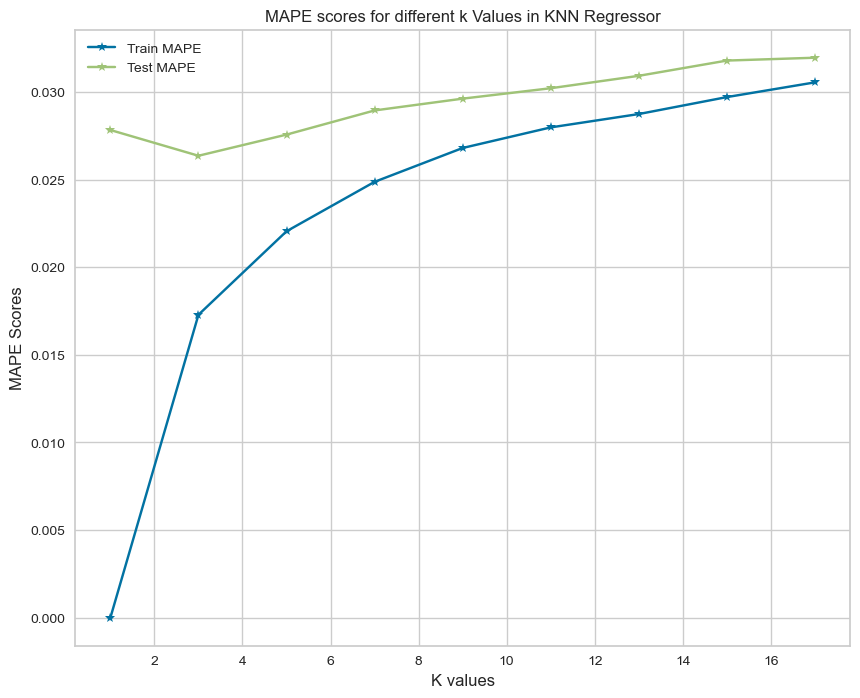

The best K value for Hold Out set is 3.


In [781]:
# Plot Train MAPE and Test MAPE
plt.figure(figsize=(10,8))
plt.plot(k_values,train_mape_scores,marker='*',label='Train MAPE')
plt.plot(k_values,test_mape_scores,marker='*',label='Test MAPE')
plt.legend()
plt.ylabel('MAPE Scores')
plt.xlabel('K values')
plt.title('MAPE scores for different k Values in KNN Regressor')
plt.show()

#best k value:
best_k_value= k_values[np.argmin(test_mape_scores)]
print(f"The best K value for Hold Out set is {best_k_value}.")

### Train the model with different K values and calculate MAPE scores using CV

In [782]:
k_values = np.arange(1, 11, 2)
cv_mape_scores = []
train_mape_scores = []
test_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)
    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_mape_scores.append(test_mape)

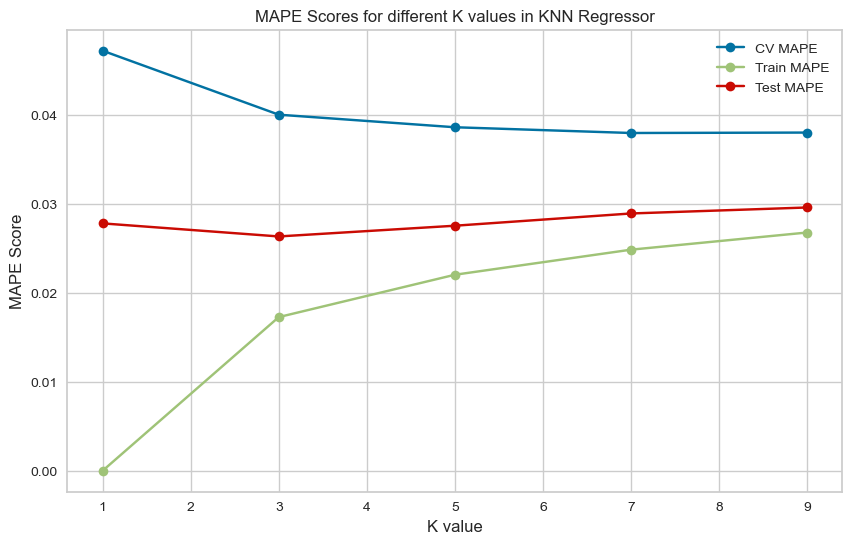

The best K value for CV is 7.


In [783]:
# Plotting CV MAPE, Train MAPE, and Test MAPE for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

# Compare the best K value for CV
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")

## Decision Tree Regressor

In [784]:
# Training model evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score,r2_score

In [785]:
dtr = DecisionTreeRegressor()

In [786]:
model = dtr.fit(X_train,y_train)

In [787]:
# prediction on the training dataset
ytrain_pred= model.predict(X_train)

In [788]:
# score method returns Coefficient of determination just in case of regression
print(f'The training r_sq is: {model.score(X_train,y_train):.2f}')
# the r_sq
print("The train r_sq is: ",r2_score(y_train,ytrain_pred))
# the MAE
print("The train MAE is: ",mean_absolute_error(y_train,ytrain_pred))
# the MSE
print("The train MSE is: ",mean_squared_error(y_train,ytrain_pred))
# the RMSE
print("The train RMSE is: ",np.sqrt(mean_squared_error(y_train,ytrain_pred)))
# the EVS
print("The train EVS is: ",explained_variance_score(y_train,ytrain_pred))

The training r_sq is: 1.00
The train r_sq is:  1.0
The train MAE is:  1.9203857723245952e-17
The train MSE is:  1.3645161603822908e-31
The train RMSE is:  3.693935787723293e-16
The train EVS is:  1.0


In [789]:
# Prediction on the testing data
ytest_pred = model.predict(X_test)

In [790]:
# the r_sq
print("The test r_sq is: ",model.score(X_test,y_test))
# the r_sq
print("The test r_sq is: ",r2_score(y_test,ytest_pred))
# the MAE
print("The test MAE is: ",mean_absolute_error(y_test,ytest_pred))
# the MSE
print("The test MSE is: ",mean_squared_error(y_test,ytest_pred))
# the RMSE
print("The test RMSE is: ",np.sqrt(mean_squared_error(y_test,ytest_pred)))
# the EVS
print("The test EVS is: ",explained_variance_score(y_test,ytest_pred))

The test r_sq is:  0.8546793168554966
The test r_sq is:  0.8546793168554966
The test MAE is:  1.6922268907563025
The test MSE is:  7.418340336134453
The test RMSE is:  2.7236630364519128
The test EVS is:  0.8547651051193923


<Axes: xlabel='Life expectancy'>

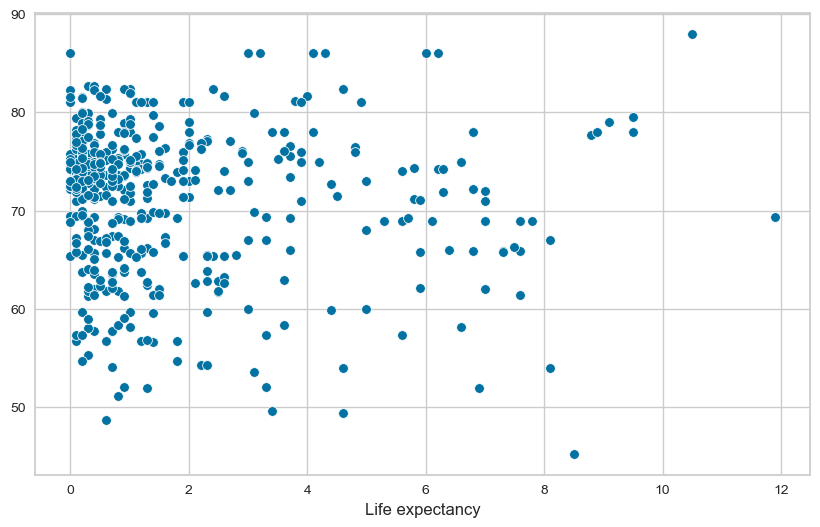

In [791]:
# plotting the observed and predicted
plt.figure(figsize=(10,6))
sns.scatterplot(x=abs(y_test-ytest_pred),y=ytest_pred)

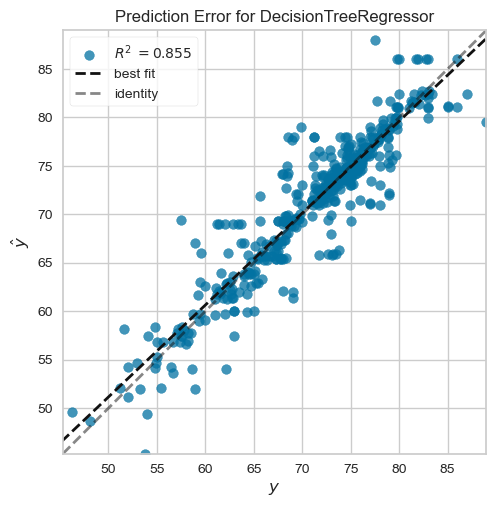

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [792]:
from yellowbrick.regressor import PredictionError
vis= PredictionError(model)
vis.fit(X_train,y_train)
vis.score(X_test,y_test)
vis.poof()

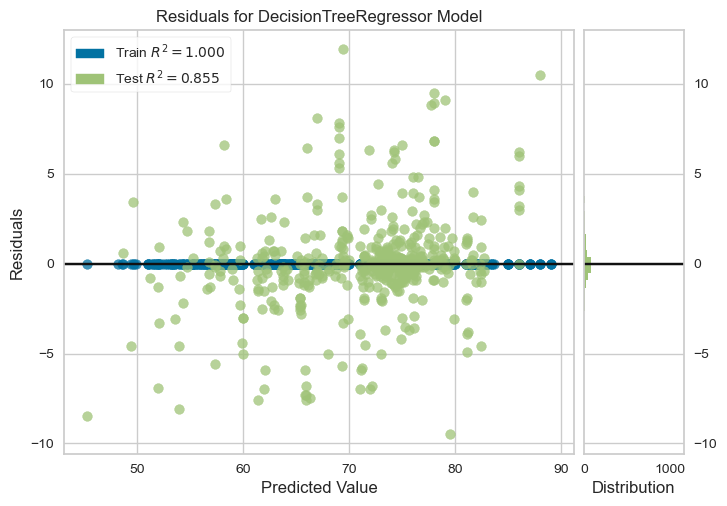

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [793]:
# Residuals plot
from yellowbrick.regressor import ResidualsPlot
vis=ResidualsPlot(model)
vis.fit(X_train,y_train)
vis.score(X_test,y_test)
vis.poof()

In [794]:
# testing model evaluation 

In [795]:
# The MAE
print(f"The MAE is: {mean_absolute_error(y_test,ytest_pred):.2f}")
# The MSE
print(f"The MSE is: {mean_squared_error(y_test,ytest_pred):.2f}")
# The RMSE
print(f"The RMSE is: {np.sqrt(mean_squared_error(y_test,ytest_pred)):.2f}")
# The EVS
print(f"The EVS is: {explained_variance_score(y_test,ytest_pred):.2f}")

The MAE is: 1.69
The MSE is: 7.42
The RMSE is: 2.72
The EVS is: 0.85


In [796]:
# k-fold cross-validation
from sklearn.model_selection import cross_val_score
# on the training dataset
score_train = cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [797]:
score_train

array([-10.15369369,  -8.52756757, -11.30315315,  -5.9645045 ,
        -5.58108108,  -7.69540541,  -5.43675676,  -9.6054955 ,
        -7.61657658,  -7.03684685])

In [798]:
# To make it positive
score_train=abs(np.mean(score_train))
score_train

7.892108108108107

In [799]:
# CV on the testing data
score_test = cross_val_score(model,X_test,y_test,scoring='neg_mean_squared_error',cv=10)
score_test

array([ -6.676875  ,  -7.17833333,  -7.274375  ,  -8.56395833,
        -6.48520833, -13.439375  ,  -6.52829787,  -8.25148936,
       -12.14085106, -20.8987234 ])

In [801]:
score_test=abs(np.mean(score_test))
score_test

9.743748670212764

In [802]:
feature_names=X_train.columns.tolist()
feature_names

['Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'Status_Developed',
 'Status_Developing']

In [804]:
pd.DataFrame({'features':model.feature_names_in_,'importance':model.feature_importances_})

,features,importance
0,Adult Mortality,0.231071
1,infant deaths,0.001268
2,Alcohol,0.003292
3,percentage expenditure,0.006602
4,Hepatitis B,0.002934
5,Measles,0.003180
6,BMI,0.010531
7,under-five deaths,0.008186
8,Polio,0.002499
9,Total expenditure,0.003754
